### Цель проекта: 1) узнать, продажа каких ремней сделает продавца богатым. 2) Потренировать нахождение коррелиции 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('ремни женские.XLSX')

### Посмотрим на наш датасет 

In [2]:
df.head(10)

,Артикул,Позиция,Выручка по продажам,Продажи,Заказы,Цена,Комментариев,Рейтинг,% Выкупа
0,57665956,1,2994210,9270,9314,323,1590,5,99
1,12653099,2,1680134,1919,2327,881,4118,5,82
2,14024250,3,1781994,5584,5633,276,11118,5,99
3,71993681,4,1798048,5152,5212,349,794,5,98
4,18275324,5,1963678,5095,5146,399,2611,5,99
5,19359699,6,1407600,4080,4094,345,1630,5,99
6,15628890,7,1326721,3899,3926,347,959,5,99
7,81944164,8,1143346,702,742,1545,865,5,94
8,58430132,9,2206822,2380,2655,882,1972,5,89
9,45849379,10,785370,642,779,1295,756,5,82


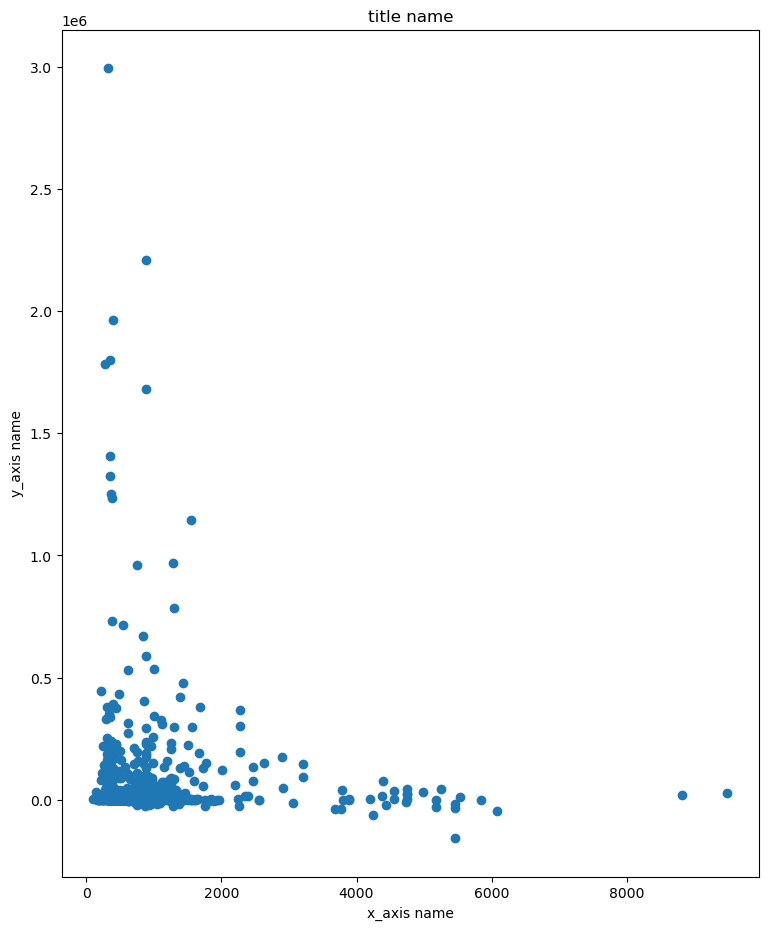

In [95]:
#Найдем график соотношения выручки по продажам (заказы * цена) от цены. Чтобы посмотреть на рынкок свысока. 
x_axis = df['Цена']
y_axis = df['Выручка по продажам']

plt.plot(x_axis, y_axis, 'o')
plt.title('title name')
plt.xlabel('x_axis name')
plt.ylabel('y_axis name')

plt.rc('figure', figsize=(10, 11))
plt.show()

### Далее будем искать самую популярную ценовую категорию ###

In [98]:
# Разобьем данные по цене на группы, используя кластеризацию среднего сдвига
# Кластеризация среднего сдвига — это алгоритм кластеризации на основе радиуса, который мы задаем. 
#Точки каждого кластера находятся в пределах назначенного раудиса от среднего значения кластера
# 1. для среднего сдвига не требуется заранее указывать количество кластеров.
# 2. можно определять плотность кластеров 

import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth

x = sorted(df['Цена'])

X = np.array(list(zip(x,np.zeros(len(x)))), dtype=np.int)

bandwidth = estimate_bandwidth(X, quantile=0.01)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

for k in range(n_clusters_):
    my_members = labels == k
    print ("cluster {0}: {1}".format(k, X[my_members, 0]))

C:\Users\user\AppData\Local\Temp\ipykernel_10992\1612152034.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = np.array(list(zip(x,np.zeros(len(x)))), dtype=np.int)


cluster 0: [ 930  930  930  930  930  930  930  930  930  930  930  930  930  930
  930  930  930  930  930  930  930  930  930  930  930  930  930  930
  930  930  930  930  930  930  930  930  930  930  930  930  930  930
  930  936  938  943  943  943  943  943  945  945  952  956  960  960
  960  960  960  960  961  961  961  961  961  961  961  961  961  961
  961  961  961  961  961  961  961  961  961  961  961  961  961  961
  961  961  961  961  961  961  961  961  961  961  961  961  961  961
  961  961  961  961  961  961  961  961  961  961  961  961  961  961
  961  961  961  961  961  961  961  961  974  975  980  980  980  984
  984  990  992  992  992  992  992  992  992  992  992  992  992  992
  992  992  992  992  992  992  992  992  992  992  992  992  992  992
  992  992  992  992  992  992  992  992  992  992  992  992  992  992
  992  992  992  992  992  992  992  992  992  992  999 1003 1004 1008
 1008 1008 1008 1008 1008 1008 1008]
cluster 1: [1071 1084 1085 10

#### Теперь нужно узнать, какая выручка в каждой ценовой категории 

In [5]:
price_revenue = pd.DataFrame(
    [['(138 - 199)', df[(df.Цена > 138) & (df.Цена <= 199)]['Выручка по продажам'].sum()], 
     ['(200 - 259)', df[(df.Цена > 199) & (df.Цена <= 259)]['Выручка по продажам'].sum()], 
     ['(260 - 322)', df[(df.Цена > 259) & (df.Цена <= 322)]['Выручка по продажам'].sum()], 
     ['(323 - 383)', df[(df.Цена > 322) & (df.Цена <= 383)]['Выручка по продажам'].sum()], 
     ['(384 - 440)', df[(df.Цена > 383) & (df.Цена <= 440)]['Выручка по продажам'].sum()], 
     ['(441 - 491)', df[(df.Цена > 440) & (df.Цена <= 491)]['Выручка по продажам'].sum()], 
     ['(492 - 544)', df[(df.Цена > 491) & (df.Цена <= 544)]['Выручка по продажам'].sum()], 
     ['(545 - 585)', df[(df.Цена > 544) & (df.Цена <= 585)]['Выручка по продажам'].sum()], 
     ['(586 - 635)', df[(df.Цена > 585) & (df.Цена <= 635)]['Выручка по продажам'].sum()], 
     ['(636 - 680)', df[(df.Цена > 635) & (df.Цена <= 680)]['Выручка по продажам'].sum()], 
     ['(681 - 744)', df[(df.Цена > 680) & (df.Цена <= 744)]['Выручка по продажам'].sum()], 
     ['(745 - 826)', df[(df.Цена > 744) & (df.Цена <= 826)]['Выручка по продажам'].sum()], 
     ['(827 - 920)', df[(df.Цена > 826) & (df.Цена <= 920)]['Выручка по продажам'].sum()], 
     ['(921 - 1008)', df[(df.Цена > 920) & (df.Цена <= 1008)]['Выручка по продажам'].sum()], 
     ['(1009 - 1070)', df[(df.Цена > 1008) & (df.Цена <= 1070)]['Выручка по продажам'].sum()], 
     ['(1071 - 1130)', df[(df.Цена > 1070) & (df.Цена <= 1130)]['Выручка по продажам'].sum()], 
     ['(1131 - 1199)', df[(df.Цена > 1130) & (df.Цена <= 1199)]['Выручка по продажам'].sum()], 
     ['(1200 - 1301)', df[(df.Цена > 1199) & (df.Цена <= 1301)]['Выручка по продажам'].sum()], 
     ['(1302 - 1397)', df[(df.Цена > 1301) & (df.Цена <= 1397)]['Выручка по продажам'].sum()], 
     ['(1398 - 1467)', df[(df.Цена > 1397) & (df.Цена <= 1467)]['Выручка по продажам'].sum()], 
     ['(1468 - 1565)', df[(df.Цена > 1467) & (df.Цена <= 1565)]['Выручка по продажам'].sum()], 
     ['(1566 - 1623)', df[(df.Цена > 1565) & (df.Цена <= 1623)]['Выручка по продажам'].sum()], 
     ['(1624 - 1680)', df[(df.Цена > 1623) & (df.Цена <= 1680)]['Выручка по продажам'].sum()], 
     ['(1681 - 1768)', df[(df.Цена > 1680) & (df.Цена <= 1768)]['Выручка по продажам'].sum()], 
     ['(1769 - 2007)', df[(df.Цена > 1768) & (df.Цена <= 2007)]['Выручка по продажам'].sum()]
    ], columns=['price', 'revenue'])

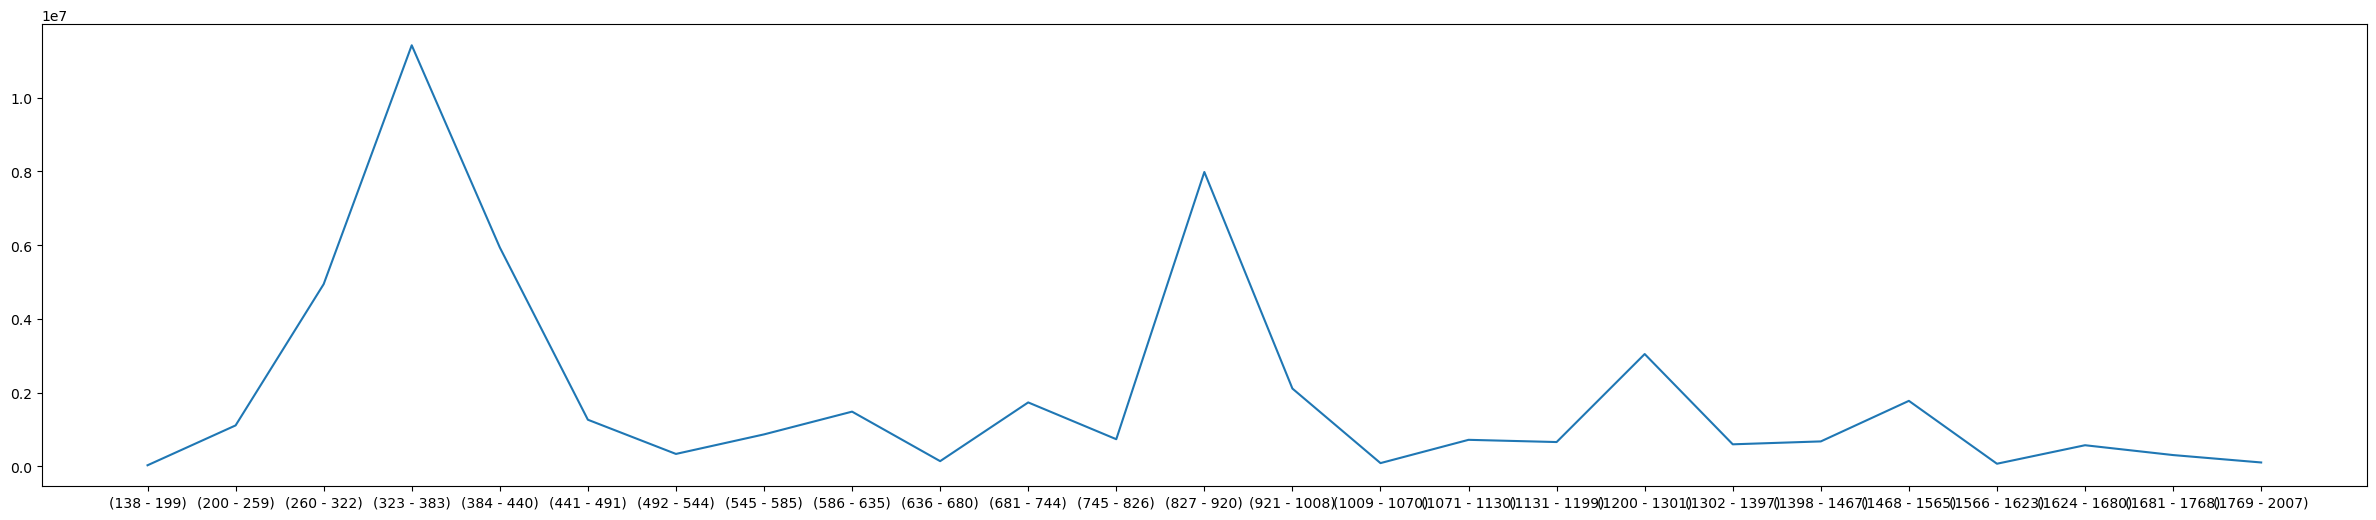

In [7]:
x = price_revenue.price
y = price_revenue.revenue

plt.figure(figsize=(30,6))
plt.plot(x, y)
plt.show()

In [100]:
price_revenue.head(15)

,price,revenue
0,(138 - 199),31467
1,(200 - 259),1112719
2,(260 - 322),4944524
3,(323 - 383),11423657
4,(384 - 440),5940373
5,(441 - 491),1267006
6,(492 - 544),339122
7,(545 - 585),869116
8,(586 - 635),1486499
9,(636 - 680),143437


### Подведем промежуточный итог: ценовая категория, в которой оборот выше всего - от 323 до 383 рублей (оборот 11423657 руб). Также привлекательные категории: 260 - 322 (оборот 4944524 руб) и категория 384 - 440 (5940373 руб). Ремни в ценовой категории 827-920 также показывают очень высокий результат (7986499 руб), но закупка данных ремней является слишком дорогостоящей для предпринимателя 

In [9]:
belts_260_440 = df[(df.Цена > 260) & (df.Цена <= 440) & (df['Выручка по продажам'] > 10000)].sort_values(by=["Выручка по продажам"], ascending=False)
belts_260_440.to_excel("belts_260_440.xlsx") 

#### Чтобы понять, какие именно ремни позволят успешно зайти на рынок, нам надо доп информация, а именно:
Наличие инфографики у артикула конкурента,

Наличие видео у конкурента,

Количество фотографий у конкурента,

Средний оборот (суммарная выручка, поделенная на всех конкунтов с одинаковыми ремнями)

In [107]:
#Я заполнила таблицу со всей необходимой информацией. 
#У каждого ремня появилась категория, число фотографий, наличие видео и инфографики 
df_74 = pd.read_excel('74.xlsx')
df_74.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Артикул              73 non-null     int64  
 1   Позиция              73 non-null     int64  
 2   Выручка по продажам  73 non-null     int64  
 3   Продажи              73 non-null     int64  
 4   Заказы               73 non-null     int64  
 5   Цена                 73 non-null     int64  
 6   Комментариев         73 non-null     int64  
 7   Рейтинг              73 non-null     int64  
 8   % Выкупа             73 non-null     int64  
 9   Категория            73 non-null     int64  
 10  Количество фото      73 non-null     int64  
 11  Инфографика          73 non-null     int64  
 12  Наличие видео        73 non-null     int64  
 13  Версия первого фото  73 non-null     object 
 14  Цвет                 73 non-null     object 
 15  Размер               73 non-null     int64

In [108]:
# Группировка по категориям, потому что мы хотим не просто узнать, например, оборот у топ ремней, но хотим узнать средний оборот на все те
# на категорию одинаковых ремней, среди которых некотоые в топе (много одинакового на маркетплейсе)
df_pivot = df_74.pivot_table(values=['Количество фото', 'Инфографика', 'Наличие видео', 'Выручка по продажам', 'Цена'], index='Категория', aggfunc = 'mean')
df_pivot.head(10)

,Выручка по продажам,Инфографика,Количество фото,Наличие видео,Цена
Категория,,,,,
1,1.137172e+06,0.250000,11.750000,0.000000,334.250000
2,1.963678e+06,1.000000,10.000000,0.000000,399.000000
3,1.798048e+06,0.000000,4.000000,0.000000,349.000000
4,5.794574e+05,0.428571,7.285714,0.142857,319.571429
5,6.430560e+05,1.000000,7.000000,0.000000,317.000000
6,5.689142e+05,0.500000,10.000000,0.250000,360.250000
7,3.918400e+05,0.000000,4.000000,0.000000,395.000000
8,2.059980e+05,1.000000,10.000000,0.500000,320.000000
9,2.463687e+05,0.000000,4.000000,0.000000,409.666667


In [50]:
#Cортировка_по_выручке_и_ограничение_на_30000 руб_средний оборот
df_pivot_sorted = df_pivot[df_pivot['Выручка по продажам'] > 30000].sort_values("Выручка по продажам", ascending=False)

In [124]:
# Это идеальная группа, которая имеет хороший оборот, но не имеет ни инфографики, ни видео, ни большого кол-во фотографий.
# Такую группу мы легко победим и заберем деньги) 

#первая группа
first_group = df_pivot_sorted[
(df_pivot_sorted['Инфографика'] <= 0.5) & 
(df_pivot_sorted['Количество фото'] < 7) & 
(df_pivot_sorted['Наличие видео'] <= 0)
]
first_group.to_excel("first_group.xlsx") 
first_group

,Выручка по продажам,Инфографика,Количество фото,Наличие видео,Цена
Категория,,,,,
3,1.798048e+06,0.0,4.0,0.0,349.000000
7,3.918400e+05,0.0,4.0,0.0,395.000000
11,3.394170e+05,0.0,2.0,0.0,351.000000
9,2.463687e+05,0.0,4.0,0.0,409.666667
22,1.311240e+05,0.0,4.0,0.0,399.000000
27,8.388900e+04,0.0,2.0,0.0,351.000000
25,7.405450e+04,0.0,2.0,0.0,392.500000
26,7.329450e+04,0.0,6.5,0.0,290.000000
28,6.568300e+04,0.0,5.0,0.0,380.000000


In [125]:
#вторая группа 
#Эту группу мы сможем победить хотя бы по двум критериям, и забрать часть денег 
second_group = df_pivot_sorted[
((df_pivot_sorted['Инфографика'] > 0.5) &
(df_pivot_sorted['Количество фото'] < 7) & 
(df_pivot_sorted['Наличие видео'] <= 0)) |
    
((df_pivot_sorted['Инфографика'] <= 0.5) &
(df_pivot_sorted['Количество фото'] >= 7) & 
(df_pivot_sorted['Наличие видео'] <= 0)) |
    
((df_pivot_sorted['Инфографика'] <= 0.5) &
(df_pivot_sorted['Количество фото'] < 7) & 
(df_pivot_sorted['Наличие видео'] > 0))   
]
second_group.to_excel("second_group.xlsx")
second_group

,Выручка по продажам,Инфографика,Количество фото,Наличие видео,Цена
Категория,,,,,
1,1.137172e+06,0.250000,11.750000,0.000000,334.250000
14,2.267540e+05,1.000000,4.000000,0.000000,440.000000
17,1.915880e+05,0.000000,11.000000,0.000000,422.000000
18,1.881000e+05,0.000000,9.000000,0.000000,300.000000
19,1.775380e+05,0.000000,7.000000,0.000000,338.000000
12,1.640457e+05,0.333333,6.666667,0.666667,300.333333
21,1.375320e+05,0.000000,5.000000,1.000000,314.000000
23,1.119705e+05,0.500000,10.000000,0.000000,298.000000
29,6.241600e+04,0.000000,8.000000,0.000000,376.000000


In [126]:
#третья группа
#Эту группу мы сможем победить хотя бы по одному критерию, и забрать часть денег 
third_group = df_pivot_sorted[
((df_pivot_sorted['Инфографика'] > 0.5) &
(df_pivot_sorted['Количество фото'] >= 7) & 
(df_pivot_sorted['Наличие видео'] <= 0)) |
    
((df_pivot_sorted['Инфографика'] <= 0.5) &
(df_pivot_sorted['Количество фото'] >= 7) & 
(df_pivot_sorted['Наличие видео'] > 0)) |
    
((df_pivot_sorted['Инфографика'] > 0.5) &
(df_pivot_sorted['Количество фото'] < 7) & 
(df_pivot_sorted['Наличие видео'] > 0))   
]
third_group.to_excel("third_group.xlsx")
third_group

,Выручка по продажам,Инфографика,Количество фото,Наличие видео,Цена
Категория,,,,,
2,1.963678e+06,1.000000,10.000000,0.000000,399.000000
5,6.430560e+05,1.000000,7.000000,0.000000,317.000000
4,5.794574e+05,0.428571,7.285714,0.142857,319.571429
6,5.689142e+05,0.500000,10.000000,0.250000,360.250000
10,3.492200e+05,1.000000,8.000000,0.000000,340.000000
13,2.291770e+05,1.000000,10.000000,0.000000,331.000000
16,2.178490e+05,1.000000,17.000000,0.000000,331.000000
20,1.212615e+05,0.500000,8.500000,1.000000,301.500000
24,1.199610e+05,1.000000,10.000000,0.000000,361.000000


## Вывод: ниже категории ремней, которые принесут деньги, если продавать их на маркетплейсе
3
7
11
9
22
27
25
26
28
30
33
34
1
14
17
18
19
12
21
23
29
31
2
5
4
6
10
13
16
20
24

#### Узнаем корреляцию между позицией и заказами

In [116]:
# Посмотри на датасет 
df_74.head(3)

,Артикул,Позиция,Выручка по продажам,Продажи,Заказы,Цена,Комментариев,Рейтинг,% Выкупа,Категория,...,Ширина,,.1,.2,.3,.4,.5,.6,.7,.8
0,57665956,1,2994210,9270,9314,323,1590,5,99,1,...,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18275324,5,1963678,5095,5146,399,2611,5,99,2,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,71993681,4,1798048,5152,5212,349,794,5,98,3,...,3.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


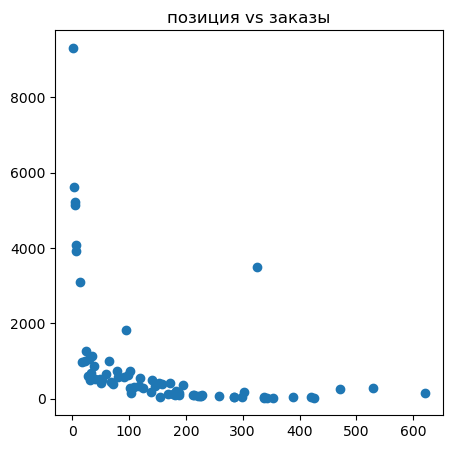

In [120]:
x = df_74.Позиция
y = df_74.Заказы

plt.figure(figsize=(5,5))
plt.scatter(x, y)
plt.title('позиция vs заказы')    
plt.show()

In [73]:
import scipy.stats
scipy.stats.pearsonr(x, y)[0] 


-0.4235941412583872

In [ ]:
Коэффициент корреляции - величина, отражающая степень взаимосвязи двух переменных между собой. Если он равен -0.42, то можно
считать, что два показателя (позиция товара и заказы товара) имеют умеренную отрицательную корреляцию 

## Таким образом, мы нашли 31 ремень, с которыми можно заходить на маркетплейс и посчитали корреляцию между позицией и заказами (для тренировки) 